# Data Analysis Using Project OpenAccess-CCLE

In [6]:
api = 'https://gen3.datacommons.io/' 
cred = '/Users/bowenbao/Documents/Project/credentials.json'
import pandas as pd
import sys
project_dir = "/Users/bowenbao/Documents/Project/"
sys.path.insert(1, '{}'.format(project_dir))
from gen3.auth import Gen3Auth 
from gen3.submission import Gen3Submission 
#from gen3.analysis import Gen3Analysis 
auth = Gen3Auth(api, refresh_file=cred)
sub = Gen3Submission(api, auth) 
%run /Users/bowenbao/Documents/Project/gen3/analysis.py

In [7]:
analysis = Gen3Analysis(api, auth) 

In [8]:
#Rerun 
%run /Users/bowenbao/Documents/Project/gen3/analysis.py
analysis = Gen3Analysis(api, auth) 

In [9]:
#Set viewing options 
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

### Dataset used is the 'Lab Test' Node within project 'OpenAccess-CCLE'

In [10]:
lab = pd.read_csv('lab_test.tsv',sep='\t') 
lab.head(10)

,type,id,project_id,submitter_id,test_type,EC50,IC50,abnormal_test_action_taken,abnormal_test_exp_meds,abnormal_test_health_risk,...,which_visit_being_performed,year_of_abnormal_test,year_of_test_form,year_tests_obtained,drugs.id,drugs.submitter_id,samples.id,samples.submitter_id,subjects.id,subjects.submitter_id
0,lab_test,db55034a-9a6c-4ef2-831c-caa48727589c,OpenAccess-CCLE,SJSA1_BONE_AZD6244_sumdrug,Drug Response Summary,None,8,None,None,None,...,None,None,None,None,NaN,NaN,bbba10ed-54dd-4d53-a732-173226a7c2f6,SJSA1_BONE,1ad24524-e13b-4d57-9299-eb81b9002d56,SJSA1_BONE_subject
1,lab_test,d728ccbd-a2bf-44ce-a24c-b8776817e170,OpenAccess-CCLE,ALLSIL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_AZD6...,Drug Response Summary,0.379500955,8,None,None,None,...,None,None,None,None,NaN,NaN,89c1b12e-a8a5-4d62-8c9d-db1dd41aeb7a,ALLSIL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,02c50d02-2d60-4d23-890d-526768f154a7,ALLSIL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_subject
2,lab_test,5b2aa4c0-42e6-4e4c-a3b3-bfcef3919374,OpenAccess-CCLE,AMO1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_AZD624...,Drug Response Summary,8.296634545,8,None,None,None,...,None,None,None,None,NaN,NaN,1423aa74-03ba-4c21-8c15-8b1d28166f44,AMO1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,963739e9-3cf5-4d12-9c39-1e8251161c07,AMO1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_subject
3,lab_test,1b87664f-e3d9-4dbd-8e9b-58478c17bee4,OpenAccess-CCLE,SKBR3_BREAST_AZD6244_sumdrug,Drug Response Summary,None,8,None,None,None,...,None,None,None,None,NaN,NaN,882c35f3-5875-42fa-bde3-011c240ceb79,SKBR3_BREAST,44d16f91-694b-4142-9a38-439eb4e0c101,SKBR3_BREAST_subject
4,lab_test,de212dc3-7127-4976-92a6-4dc9e7acd1c8,OpenAccess-CCLE,AN3CA_ENDOMETRIUM_AZD6244_sumdrug,Drug Response Summary,2.69486618,8,None,None,None,...,None,None,None,None,NaN,NaN,71b12afa-7354-4dc7-9d65-444b51242094,AN3CA_ENDOMETRIUM,08b27da2-8af7-4b8b-8cbc-4c505d00f4f3,AN3CA_ENDOMETRIUM_subject
5,lab_test,ccd9ed46-e5e9-4e18-89e4-f2f9b9bde094,OpenAccess-CCLE,ASPC1_PANCREAS_AZD6244_sumdrug,Drug Response Summary,2.141568422,1.271577716,None,None,None,...,None,None,None,None,NaN,NaN,5b707c10-f2f8-4dec-bb62-e0ff4d82201d,ASPC1_PANCREAS,e8c89731-3adc-47d8-870e-1ffc6b054134,ASPC1_PANCREAS_subject
6,lab_test,e227ebef-2d83-4c7e-ac66-b7f6d2a1dda0,OpenAccess-CCLE,AU565_BREAST_AZD6244_sumdrug,Drug Response Summary,None,8,None,None,None,...,None,None,None,None,NaN,NaN,0b523c3b-7281-4784-809b-1170a9718f2b,AU565_BREAST,c1b5b639-2ae4-4f47-807c-181111af20ed,AU565_BREAST_subject
7,lab_test,eb2ba3ad-aa9a-4222-90b1-0e79cdcd67de,OpenAccess-CCLE,AZ521_STOMACH_AZD6244_sumdrug,Drug Response Summary,None,8,None,None,None,...,None,None,None,None,NaN,NaN,a058dc53-0015-47fc-87ee-ca628292e1aa,AZ521_STOMACH,74ca3a98-2747-4f17-ad07-62222a6b8bd7,AZ521_STOMACH_subject
8,lab_test,f7bb0338-0456-448b-8694-f397e76dcd2d,OpenAccess-CCLE,BCPAP_THYROID_AZD6244_sumdrug,Drug Response Summary,0.310981452,8,None,None,None,...,None,None,None,None,NaN,NaN,97400bba-6952-4a93-833e-b0cdb4c4c333,BCPAP_THYROID,7f085ce2-708c-491f-ac64-17ee0651024d,BCPAP_THYROID_subject
9,lab_test,a472e140-6b7e-42ee-9bc8-919f6d1e0db9,OpenAccess-CCLE,BDCM_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_AZD624...,Drug Response Summary,0.240021586,0.465061456,None,None,None,...,None,None,None,None,NaN,NaN,e6250be8-aa85-469a-95b6-9dc519390a7b,BDCM_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,a12ce7f1-9e58-4b8d-a28d-b150cae4e257,BDCM_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_subject


In [ ]:
lab['fit_type'].unique()

### Plot a bar graph of categorical variable counts in a dataframe

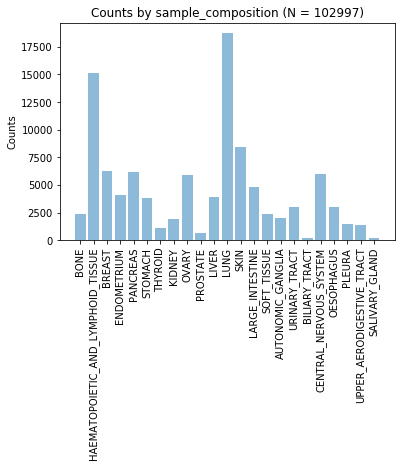

In [11]:
analysis.plot_categorical_property("sample_composition",lab) 

### Plot a bar graph of categorical variable counts in sorted order

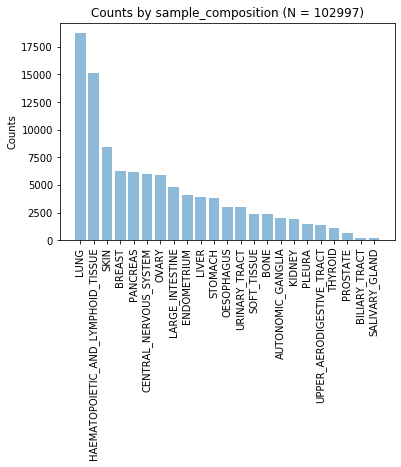

In [12]:
analysis.plot_categorical_property_by_order("sample_composition", lab)

### Plot a histogram the count distribution of a numeric variable

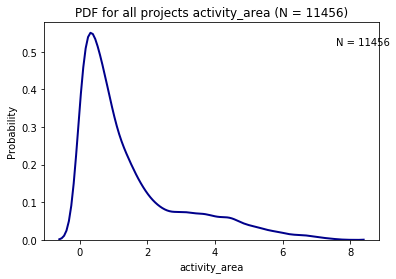

In [13]:
analysis.plot_numeric_property("activity_area", lab)

### Make a violin plot of the count distribution of a numeric property by a categorical property

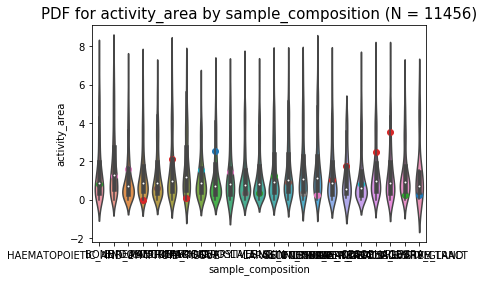

In [14]:
analysis.plotviolin_numeric_property_by_categorical_property(df = lab, numeric_property = "activity_area", categorical_property = "sample_composition")

### Create a pie chart of counts within a categorical property

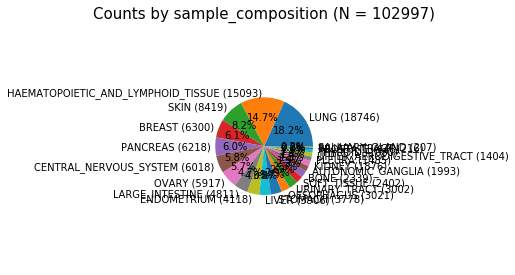

In [15]:
analysis.pie_categorical_property_count(property = "sample_composition", df = lab)

### Create a Scatter Plot comparing the distribution of two numerical variables

In [ ]:
#Rerun 
%run /Users/bowenbao/Documents/Project/gen3/analysis.py
analysis = Gen3Analysis(api, auth) 

/Users/bowenbao/Documents/Project/gen3/analysis.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[numeric_property_b] = pd.to_numeric(df[numeric_property_b],errors='coerce') #BB: this line changes object into float


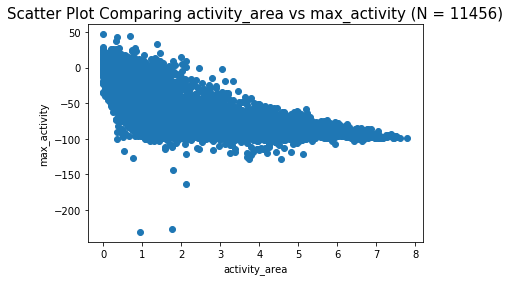

In [16]:
analysis.scatter_numeric_by_numeric(lab, "activity_area", "max_activity")

### Displays the counts of each category in a categorical variable

In [17]:
analysis.property_counts_by_project("sample_composition", lab) 

,Project,Total,PROSTATE,THYROID,LIVER,BONE,KIDNEY,LUNG,URINARY_TRACT,ENDOMETRIUM,...,CENTRAL_NERVOUS_SYSTEM,OESOPHAGUS,BREAST,STOMACH,BILIARY_TRACT,OVARY,AUTONOMIC_GANGLIA,LARGE_INTESTINE,UPPER_AERODIGESTIVE_TRACT,HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
0,OpenAccess-CCLE,102997,648,1080,3906,2339,1876,18746,3002,4118,...,6018,3021,6300,3778,216,5917,1993,4811,1404,15093


### Displays the counts of each category in a categorical variable in table form

In [19]:
analysis.property_counts_table("sample_composition", lab)

,sample_composition,count
11,LUNG,18746
1,HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,15093
12,SKIN,8419
2,BREAST,6300
4,PANCREAS,6218
18,CENTRAL_NERVOUS_SYSTEM,6018
8,OVARY,5917
13,LARGE_INTESTINE,4811
3,ENDOMETRIUM,4118
10,LIVER,3906
